In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [26]:
# Load the dataset
dataset_path = "C:/Users/karth/Downloads/bbc-text.csv/bbc-text.csv"
df = pd.read_csv(dataset_path)


In [27]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [28]:
print(df.columns)


Index(['category', 'text'], dtype='object')


In [29]:

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [30]:
# Define the name of the text column and the category column
text_column_name = "text"
category_column_name = "category"

# Convert any non-string values in the text column to string
df[text_column_name] = df[text_column_name].astype(str)

In [31]:
# Split data into text and labels
text_data = df[text_column_name].values
labels = df[category_column_name].values

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [32]:

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Pad sequences to ensure uniform length
max_length = 100
sequences_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels_encoded, test_size=0.2, random_state=42)


In [33]:
# Define the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Define the embedding dimension
embedding_dim = 100

# Define model architecture with CNN
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [34]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print("Model Test Accuracy:", accuracy)

Epoch 1/20
28/28 [==============================] - 6s 146ms/step - loss: 1.6064 - accuracy: 0.2247 - val_loss: 1.5967 - val_accuracy: 0.2539
Epoch 2/20
28/28 [==============================] - 4s 141ms/step - loss: 1.5230 - accuracy: 0.3444 - val_loss: 1.5213 - val_accuracy: 0.3551
Epoch 3/20
28/28 [==============================] - 5s 177ms/step - loss: 1.1891 - accuracy: 0.5242 - val_loss: 1.0135 - val_accuracy: 0.5281
Epoch 4/20
28/28 [==============================] - 5s 168ms/step - loss: 0.6252 - accuracy: 0.8022 - val_loss: 0.4662 - val_accuracy: 0.8719
Epoch 5/20
28/28 [==============================] - 5s 177ms/step - loss: 0.2020 - accuracy: 0.9494 - val_loss: 0.2918 - val_accuracy: 0.9034
Epoch 6/20
28/28 [==============================] - 5s 169ms/step - loss: 0.0900 - accuracy: 0.9736 - val_loss: 0.2749 - val_accuracy: 0.8989
Epoch 7/20
28/28 [==============================] - 5s 182ms/step - loss: 0.0584 - accuracy: 0.9837 - val_loss: 0.2759 - val_accuracy: 0.9056
Epoch 

In [37]:
import numpy as np

# Choose number of examples to display
num_examples = 50

# Randomly select some samples from test dataset
random_indices = np.random.choice(len(X_test), num_examples, replace=False)
sample_texts = X_test[random_indices]
sample_labels = y_test[random_indices]

# Make predictions using the trained model
predictions = model_cnn.predict(sample_texts)
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to original categories
decoded_labels = label_encoder.inverse_transform(predicted_labels)
actual_labels = label_encoder.inverse_transform(sample_labels)

# Display the results
print("Example Data and Predictions:")
print("-----------------------------------")
for i in range(num_examples):
    print("Text:", text_data[random_indices[i]])
    print("Actual Category:", actual_labels[i])
    print("Predicted Category:", decoded_labels[i])
    print("-----------------------------------")

# Compute accuracy
accuracy = np.mean(predicted_labels == sample_labels)
print("Accuracy on Example Data:", accuracy)


2/2 [==============================] - 0s 13ms/step
Example Data and Predictions:
-----------------------------------
Text: mandelson warning to bbc the bbc should steer away from  demonising  ex-downing street media chief alastair campbell  peter mandelson has said.  the european commissioner and former labour minister was speaking amid claims that mr campbell is part of a labour  dirty tricks  campaign. that charge was denied by mr mandelson  who said the tories were afraid of mr campbell s campaigning skills. he warned the bbc that attacking mr campbell had brought it trouble before. that was a reference to the hutton inquiry following a bbc story claiming downing street  sexed up  iraq s weapons of mass destruction dossier.  the affair prompted the resignation of bbc chairman gavyn davies  director-general greg dyke and reporter andrew gilligan. labour has attracted media criticism for using new freedom of information laws to dig up information about tory leader michael howard s pa

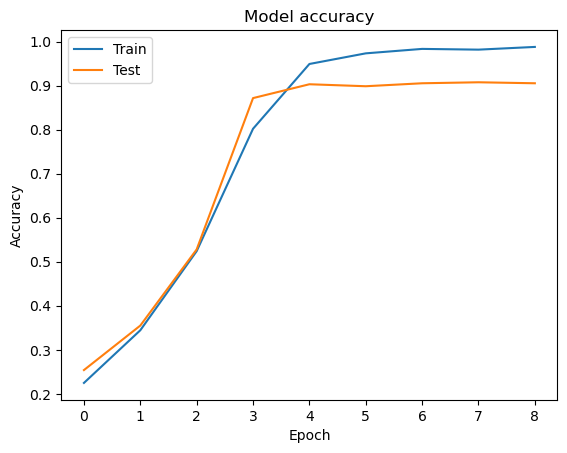

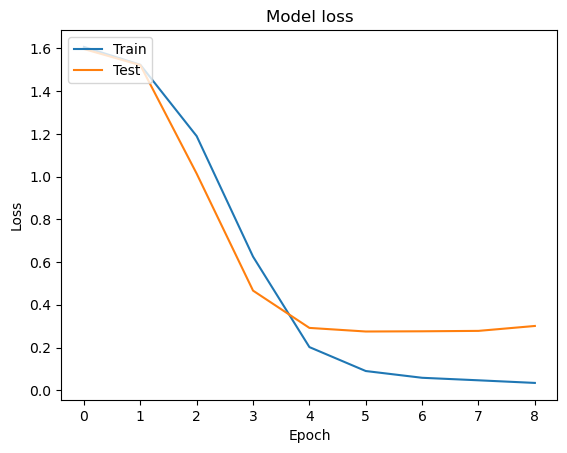

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
vocab_size = len(tokenizer.word_index) + 1

# Define the embedding dimension
embedding_dim = 100

# Define model architecture with LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [43]:
# Train the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print("LSTM Model Test Accuracy:", accuracy_lstm)


Epoch 1/20
28/28 [==============================] - 29s 860ms/step - loss: 1.5848 - accuracy: 0.2764 - val_loss: 1.3982 - val_accuracy: 0.4809
Epoch 2/20
28/28 [==============================] - 23s 824ms/step - loss: 1.1161 - accuracy: 0.5449 - val_loss: 0.9805 - val_accuracy: 0.6472
Epoch 3/20
28/28 [==============================] - 23s 816ms/step - loss: 0.8215 - accuracy: 0.6629 - val_loss: 1.1344 - val_accuracy: 0.6787
Epoch 4/20
28/28 [==============================] - 23s 815ms/step - loss: 0.5772 - accuracy: 0.8466 - val_loss: 0.6433 - val_accuracy: 0.7573
Epoch 5/20
28/28 [==============================] - 23s 806ms/step - loss: 0.3404 - accuracy: 0.8893 - val_loss: 0.5836 - val_accuracy: 0.8247
Epoch 6/20
28/28 [==============================] - 23s 812ms/step - loss: 0.1547 - accuracy: 0.9624 - val_loss: 0.6768 - val_accuracy: 0.8382
Epoch 7/20
28/28 [==============================] - 23s 840ms/step - loss: 0.2222 - accuracy: 0.9596 - val_loss: 0.4563 - val_accuracy: 0.8697

In [44]:
import numpy as np

# Choose number of examples to display
num_examples = 50

# Randomly select some samples from test dataset
random_indices = np.random.choice(len(X_test), num_examples, replace=False)
sample_texts = X_test[random_indices]
sample_labels = y_test[random_indices]

# Make predictions using the trained LSTM model
predictions_lstm = model_lstm.predict(sample_texts)
predicted_labels_lstm = np.argmax(predictions_lstm, axis=1)

# Decode the encoded labels back to original categories
decoded_labels_lstm = label_encoder.inverse_transform(predicted_labels_lstm)
actual_labels_lstm = label_encoder.inverse_transform(sample_labels)

# Display the results
print("Example Data and Predictions for LSTM Model:")
print("-----------------------------------")
for i in range(num_examples):
    print("Text:", text_data[random_indices[i]])
    print("Actual Category:", actual_labels_lstm[i])
    print("Predicted Category:", decoded_labels_lstm[i])
    print("-----------------------------------")

# Compute accuracy
accuracy_lstm = np.mean(predicted_labels_lstm == sample_labels)
print("Accuracy on Example Data for LSTM Model:", accuracy_lstm)


2/2 [==============================] - 1s 39ms/step
Example Data and Predictions for LSTM Model:
-----------------------------------
Text: redknapp s saints face pompey tie new southampton manager harry redknapp faces an immediate reunion with his old club portsmouth after they were drawn together in the fa cup fourth round.  exeter city face a home tie against middlesbrough if they can see off holders manchester united in a replay. oldham s reward for beating manchester city is a home tie with bolton  while yeovil will be away to charlton. chelsea host birmingham  tottenham travel to west brom and arsenal will entertain championship side wolves. saints boss redknapp was upbeat about the draw despite having to face the club he walked out on just six weeks ago.  i ve said before  i can walk away from portsmouth with my head held high  i m proud of what i did there and no one can take that away from me   said redknapp.  maybe i ll be in for some stick  there s always some of that but we 

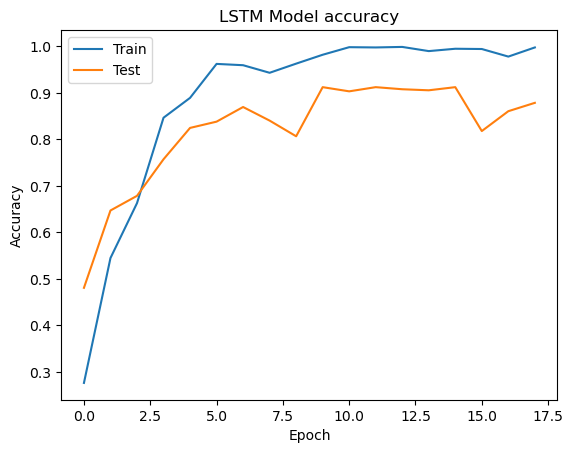

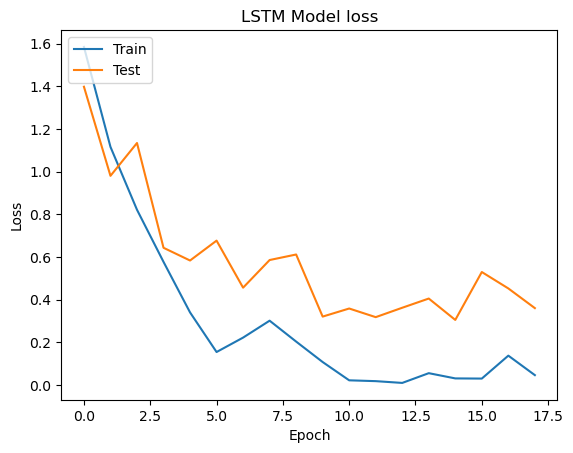

In [45]:
# Plot training & validation accuracy values
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Accuracy of CNN Model: 0.98
Accuracy of LSTM Model: 0.96


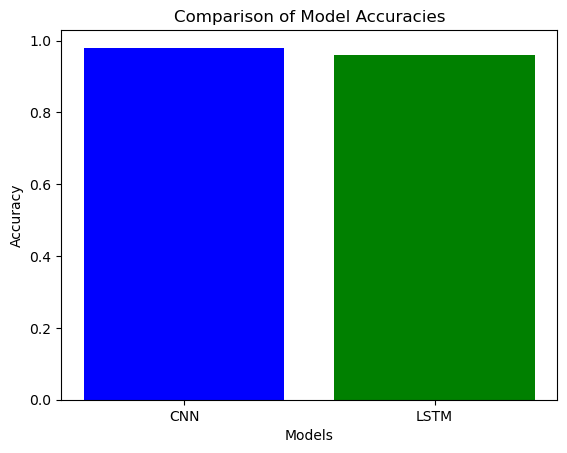

In [50]:
# Compare accuracies of CNN and LSTM models
print("Accuracy of CNN Model:", accuracy)
print("Accuracy of LSTM Model:", accuracy_lstm)

# Plotting bar chart for comparison
models = ['CNN', 'LSTM']
accuracies = [accuracy, accuracy_lstm]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification


In [26]:
# Load the dataset
dataset_path = "C:/Users/karth/Downloads/bbc-text.csv/bbc-text.csv"
df = pd.read_csv(dataset_path)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Define the name of the text column and the category column
text_column_name = "text"
category_column_name = "category"

# Convert any non-string values in the text column to string
df[text_column_name] = df[text_column_name].astype(str)

# Split data into text and labels
text_data = df[text_column_name].values
labels = df[category_column_name].values

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_inputs = tokenizer(text_data.tolist(), padding=True, truncation=True, return_tensors="tf")

# Convert the TensorFlow tensor to a numpy array
input_ids = np.array(encoded_inputs['input_ids'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels_encoded, test_size=0.2, random_state=42)

In [27]:
# Load pre-trained BERT model
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_bert.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the BERT model
history_bert = model_bert.fit(
    x=X_train,
    y=y_train,
    epochs=3,
    batch_size=8,
    validation_data=(X_test, y_test)
)

# Evaluate the BERT model
loss_bert, accuracy_bert = model_bert.evaluate(x=X_test, y=y_test)
print("BERT Model Test Accuracy:", accuracy_bert)

Epoch 1/3
223/223 [==============================] - 3641s 16s/step - loss: 0.5528 - accuracy: 0.8545 - val_loss: 0.0760 - val_accuracy: 0.9888
Epoch 2/3
223/223 [==============================] - 3431s 15s/step - loss: 0.0822 - accuracy: 0.9854 - val_loss: 0.0449 - val_accuracy: 0.9910
Epoch 3/3
14/14 [==============================] - 1122s 80s/step - loss: 0.0344 - accuracy: 0.9933
BERT Model Test Accuracy: 0.9932584166526794


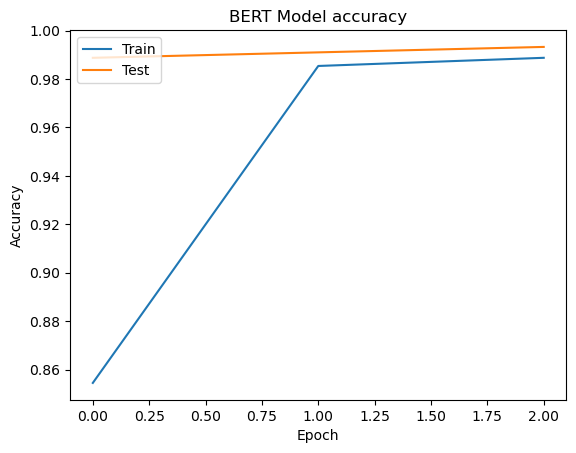

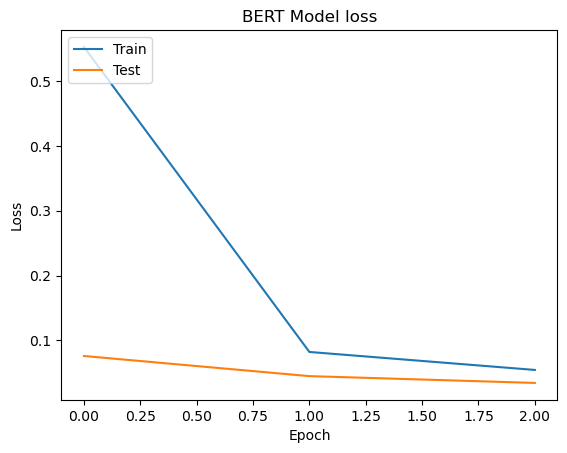

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])
plt.title('BERT Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])
plt.title('BERT Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Accuracy of CNN Model: 0.98
Accuracy of LSTM Model: 0.96
Accuracy of BERT Model: 0.99


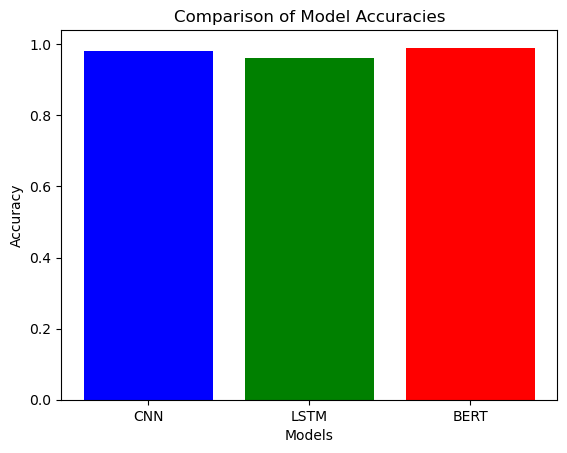

In [50]:
import matplotlib.pyplot as plt

# Define accuracy values for CNN and LSTM models (replace with your actual values)
accuracy_cnn = 0.98
accuracy_lstm = 0.96

# Define accuracy value for BERT model (replace with your actual value)
accuracy_bert = 0.99

# Print accuracies of CNN, LSTM, and BERT models
print("Accuracy of CNN Model:", accuracy_cnn)
print("Accuracy of LSTM Model:", accuracy_lstm)
print("Accuracy of BERT Model:", accuracy_bert)

# Plotting bar chart for comparison
models = ['CNN', 'LSTM', 'BERT']  # Add 'BERT' to the list of models
accuracies = [accuracy_cnn, accuracy_lstm, accuracy_bert]  # Add accuracy_bert to the list of accuracies

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
